In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "umbria"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,10,Umbria,0,0,0,0,0,0,0,...,0.0,8.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,10,Umbria,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,10,Umbria,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,10,Umbria,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,10,Umbria,0,0,0,0,0,0,0,...,0.0,23.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2020-11-26T17:00:00,10,Umbria,349,68,417,9017,9434,-503,343,...,14.0,4791.0,1640.0,-489.0,16.31,4.42,7.16,20.91,-2.86,-5.06
276,2020-11-27T17:00:00,10,Umbria,353,62,415,8635,9050,-384,261,...,14.0,3955.0,1275.0,-382.0,14.94,4.59,6.60,20.47,-8.82,-4.07
277,2020-11-28T17:00:00,10,Umbria,351,64,415,8238,8653,-397,348,...,6.0,4262.0,1247.0,-397.0,15.42,4.80,8.17,27.91,3.23,-4.39
278,2020-11-29T17:00:00,10,Umbria,355,65,420,8023,8443,-210,310,...,5.0,3232.0,1169.0,-215.0,15.48,4.97,9.59,26.52,1.56,-2.43


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 30, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 68
Nuovi tamponi: 480.0
Percentuale nuovi positivi/nuovi tamponi: 14.2 %
Nuovi guariti: 263.0
Nuovi deceduti: 13.0
Variazione positivi ricoverati con sintomi: 11.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: -219.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 30, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-01T17:00:00,10,Umbria,38,3,41,521,562,25,46,...,0.0,1931.0,1115.0,26.0,7.32,7.30,2.38,4.13,0.00,4.66
1,2020-10-02T17:00:00,10,Umbria,39,4,43,567,610,48,62,...,0.0,1925.0,1042.0,46.0,9.30,7.05,3.22,5.95,33.33,8.54
2,2020-10-03T17:00:00,10,Umbria,41,5,46,588,634,24,42,...,0.0,2139.0,1179.0,21.0,10.87,7.26,1.96,3.56,25.00,3.93
3,2020-10-04T17:00:00,10,Umbria,42,4,46,649,695,61,72,...,1.0,2126.0,1170.0,61.0,8.70,6.62,3.39,6.15,-20.00,9.62
4,2020-10-05T17:00:00,10,Umbria,42,5,47,659,706,11,19,...,0.0,421.0,229.0,10.0,10.64,6.66,4.51,8.30,25.00,1.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-26T17:00:00,10,Umbria,349,68,417,9017,9434,-503,343,...,14.0,4791.0,1640.0,-489.0,16.31,4.42,7.16,20.91,-2.86,-5.06
57,2020-11-27T17:00:00,10,Umbria,353,62,415,8635,9050,-384,261,...,14.0,3955.0,1275.0,-382.0,14.94,4.59,6.60,20.47,-8.82,-4.07
58,2020-11-28T17:00:00,10,Umbria,351,64,415,8238,8653,-397,348,...,6.0,4262.0,1247.0,-397.0,15.42,4.80,8.17,27.91,3.23,-4.39
59,2020-11-29T17:00:00,10,Umbria,355,65,420,8023,8443,-210,310,...,5.0,3232.0,1169.0,-215.0,15.48,4.97,9.59,26.52,1.56,-2.43


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

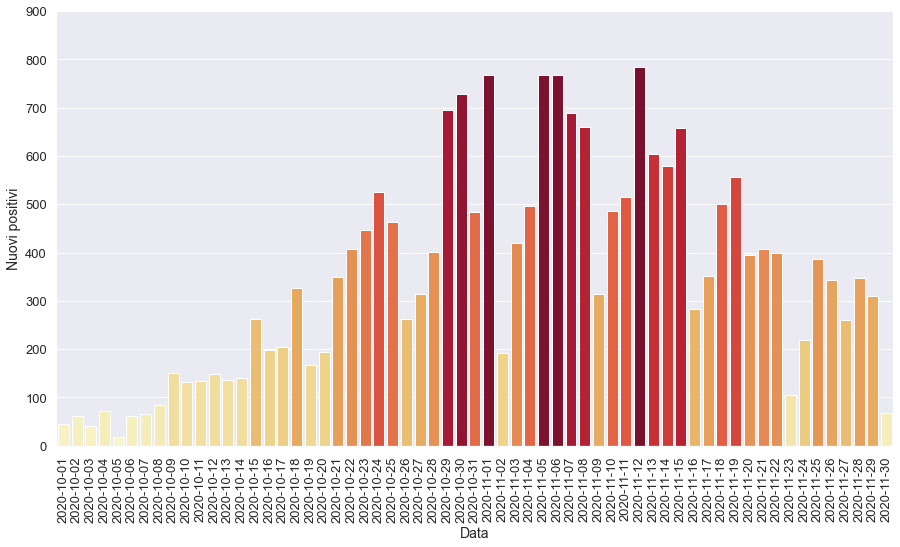

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

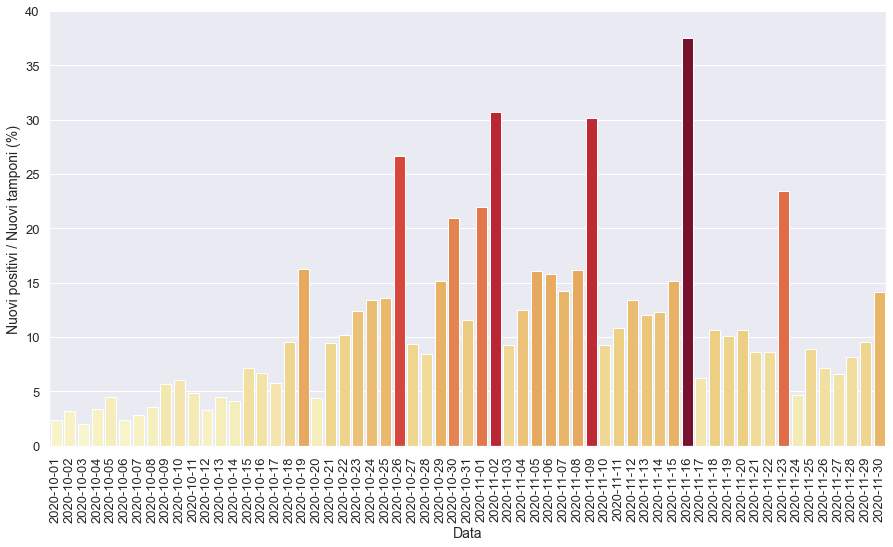

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

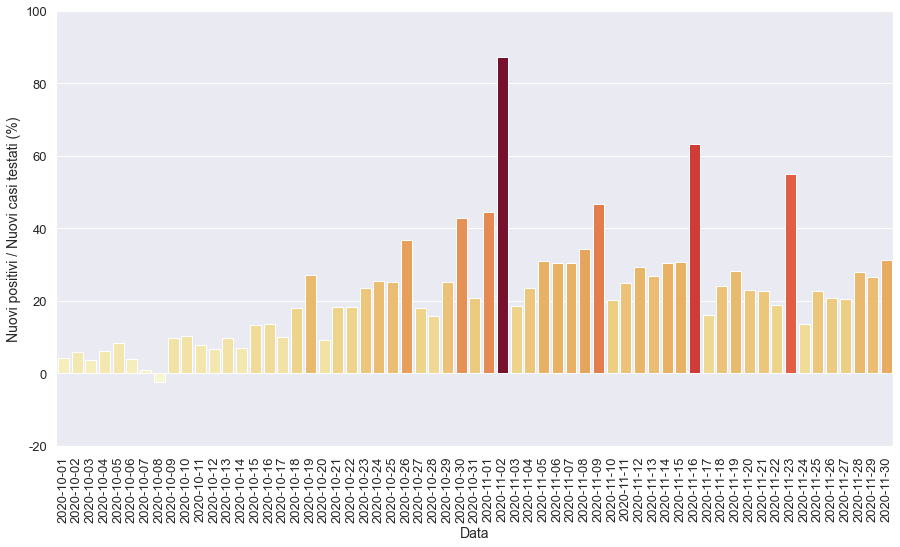

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

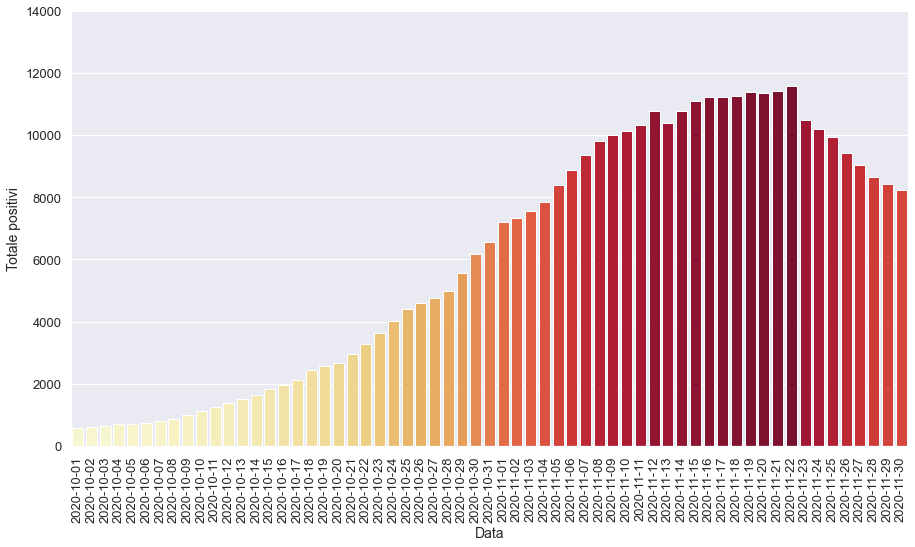

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

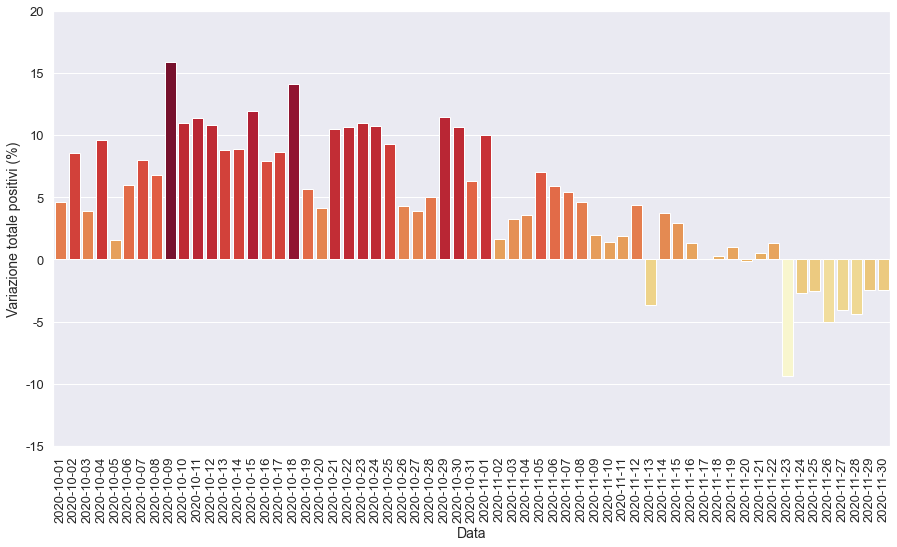

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

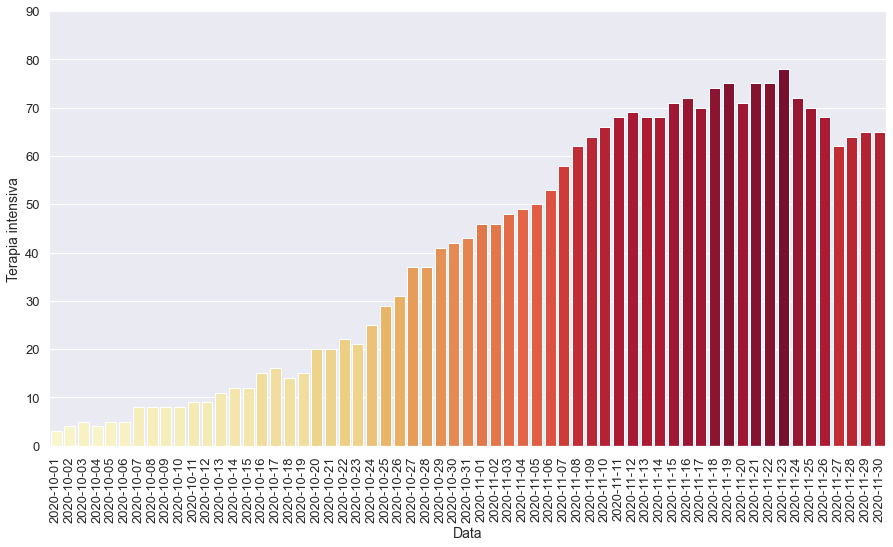

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

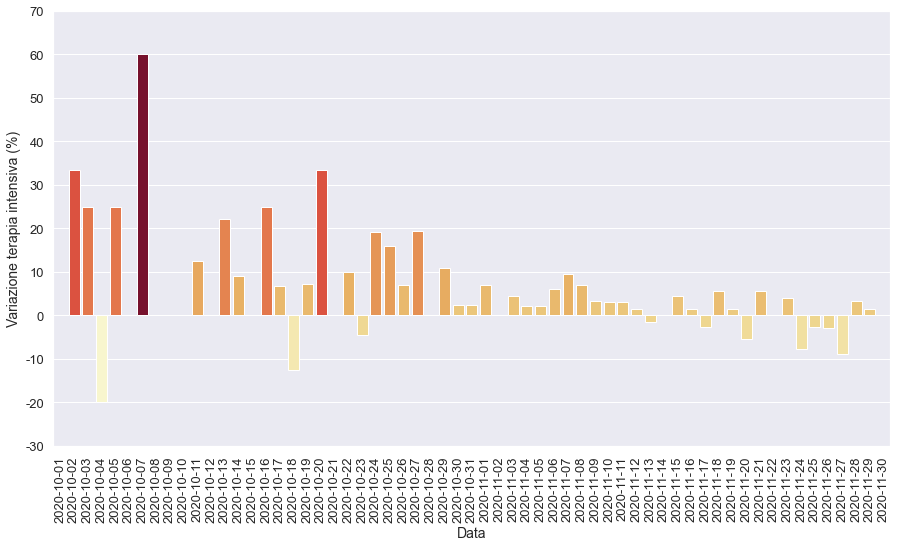

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

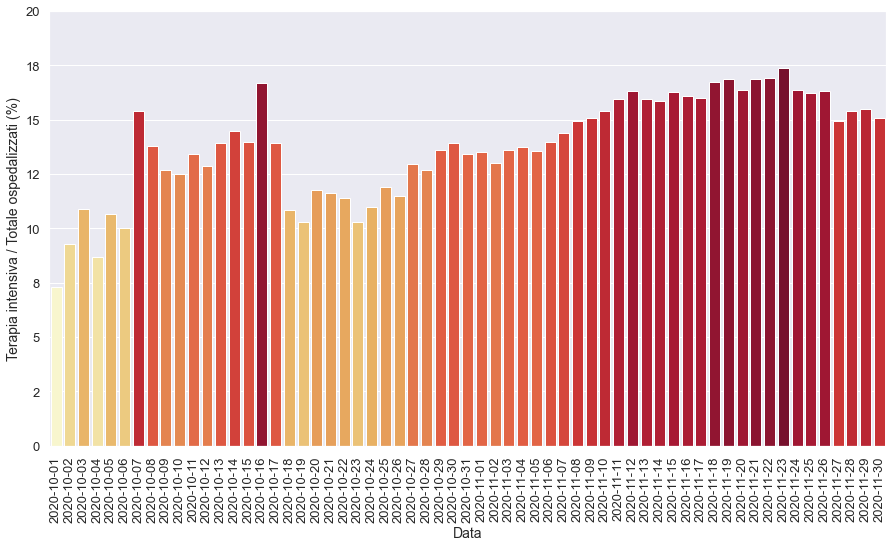

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

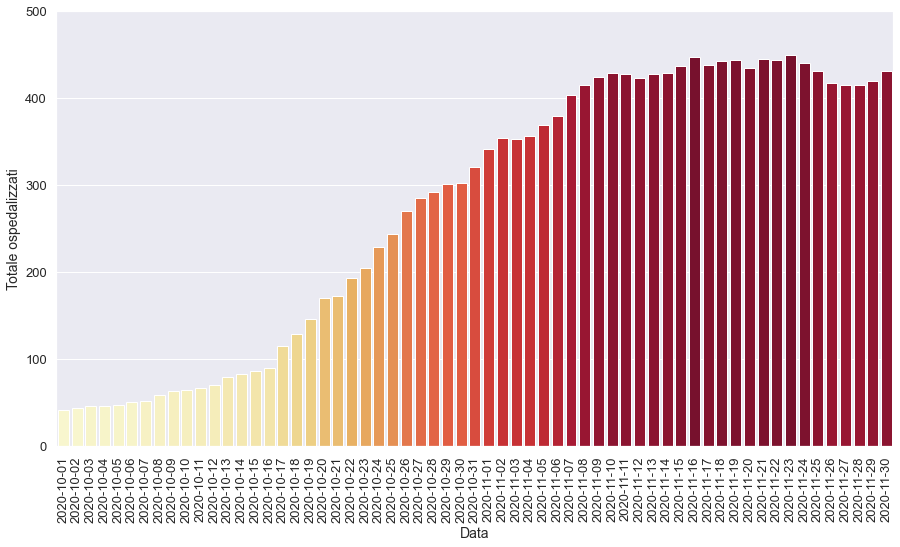

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

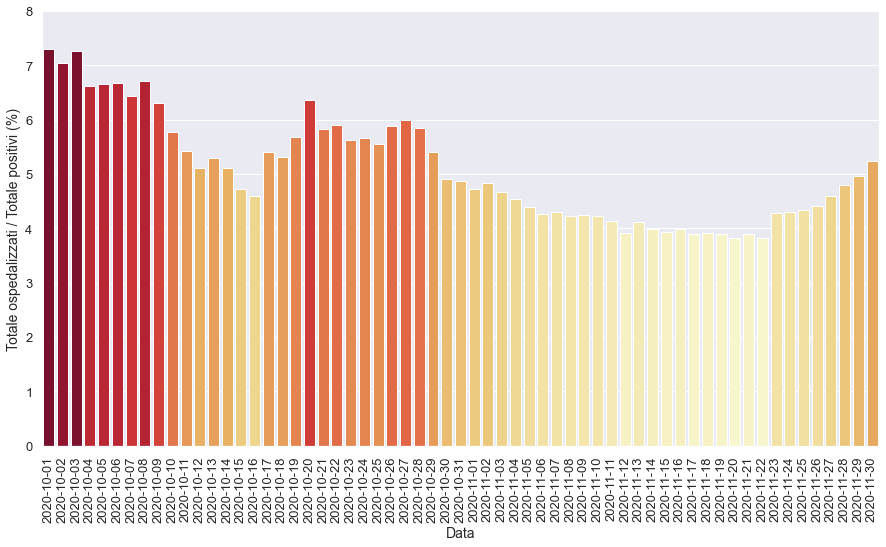

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

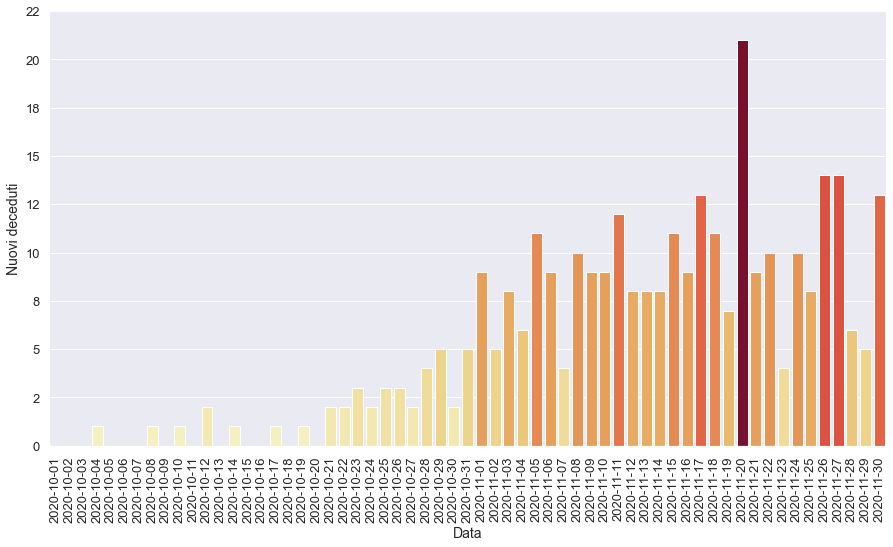

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

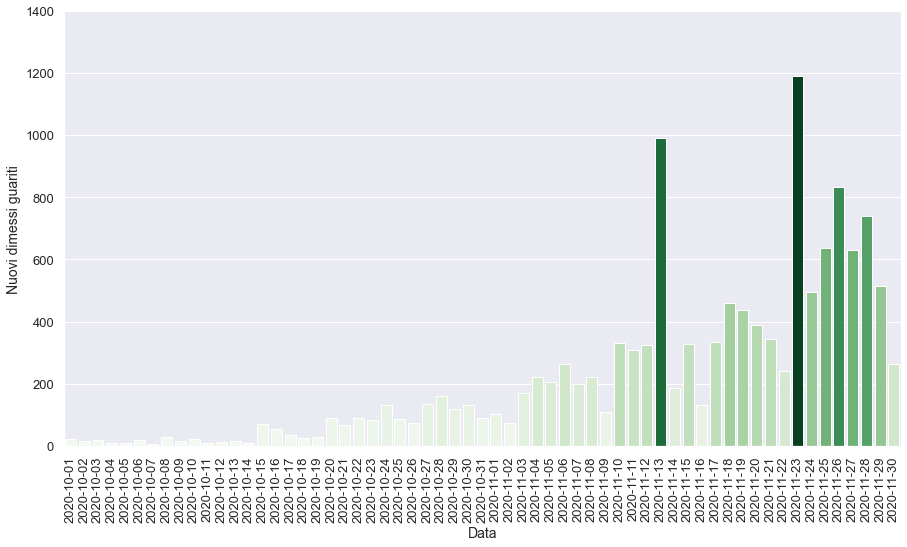

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-31T17:00:00,10,Umbria,277,43,320,6234,6554,388,483,...,5.0,4177.0,2312.0,370.0,13.44,4.88,11.56,20.89,2.38,6.29
1,2020-11-01T17:00:00,10,Umbria,295,46,341,6869,7210,656,768,...,9.0,3489.0,1721.0,635.0,13.49,4.73,22.01,44.63,6.98,10.01
2,2020-11-02T17:00:00,10,Umbria,308,46,354,6972,7326,116,193,...,5.0,628.0,221.0,103.0,12.99,4.83,30.73,87.33,0.00,1.61
3,2020-11-03T17:00:00,10,Umbria,305,48,353,7214,7567,241,420,...,8.0,4540.0,2263.0,242.0,13.60,4.66,9.25,18.56,4.35,3.29
4,2020-11-04T17:00:00,10,Umbria,307,49,356,7480,7836,269,496,...,6.0,3985.0,2098.0,266.0,13.76,4.54,12.45,23.64,2.08,3.55
5,2020-11-05T17:00:00,10,Umbria,319,50,369,8020,8389,553,768,...,11.0,4768.0,2479.0,540.0,13.55,4.40,16.11,30.98,2.04,7.06
6,2020-11-06T17:00:00,10,Umbria,326,53,379,8506,8885,496,767,...,9.0,4855.0,2511.0,486.0,13.98,4.27,15.80,30.55,6.00,5.91
7,2020-11-07T17:00:00,10,Umbria,345,58,403,8967,9370,485,688,...,4.0,4834.0,2256.0,461.0,14.39,4.30,14.23,30.50,9.43,5.46
8,2020-11-08T17:00:00,10,Umbria,353,62,415,9385,9800,430,660,...,10.0,4085.0,1920.0,418.0,14.94,4.23,16.16,34.38,6.90,4.59
9,2020-11-09T17:00:00,10,Umbria,360,64,424,9572,9996,196,314,...,9.0,1040.0,671.0,187.0,15.09,4.24,30.19,46.80,3.23,2.00


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

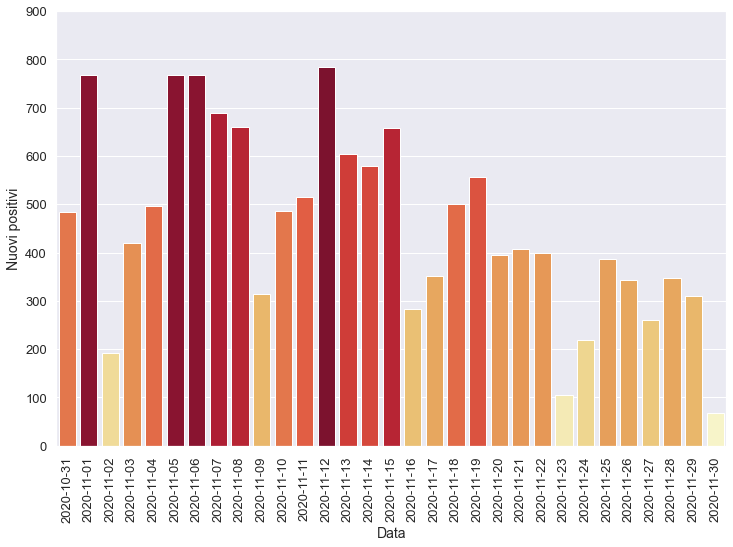

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

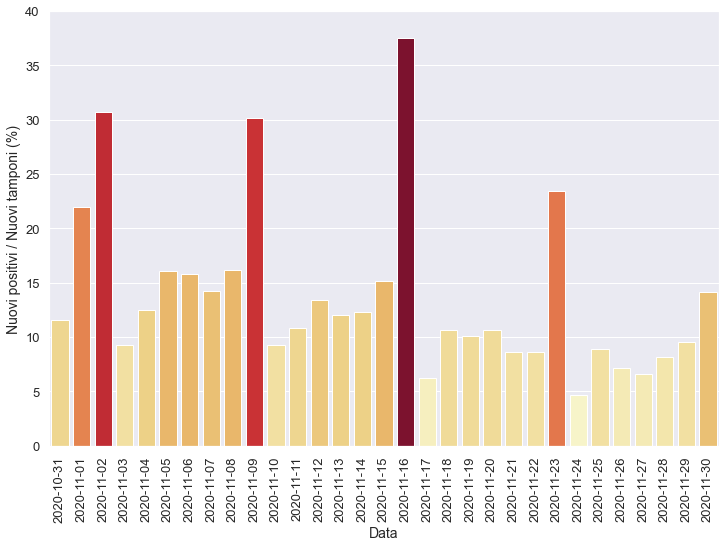

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

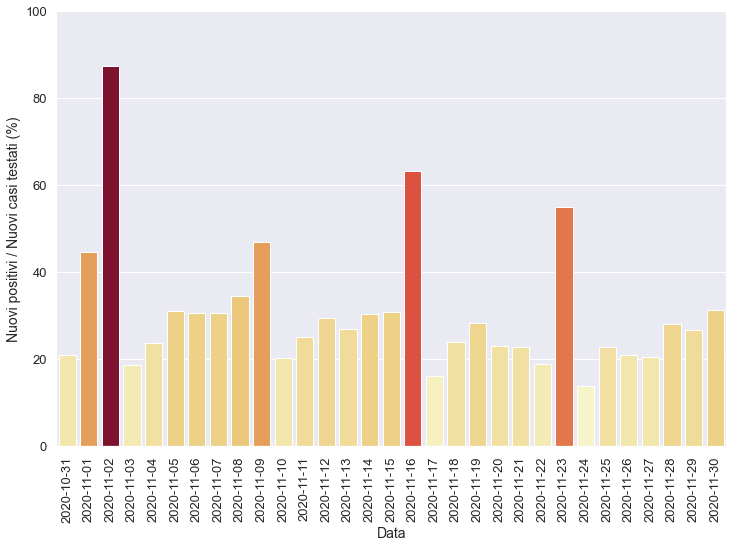

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

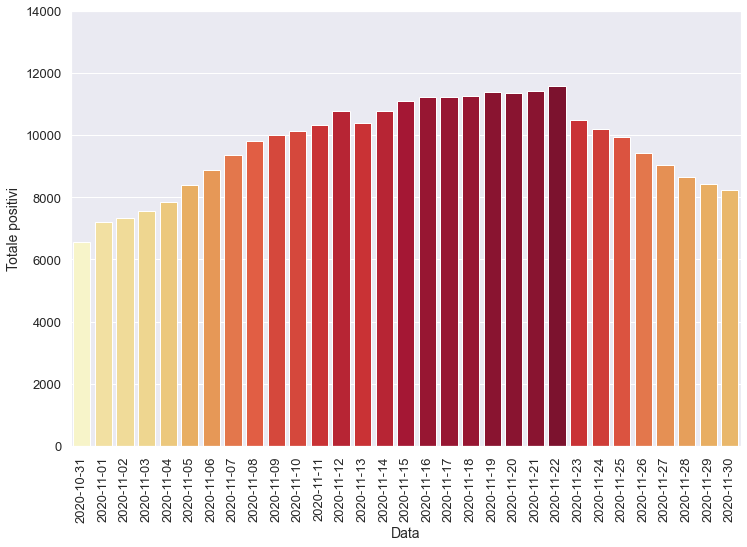

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

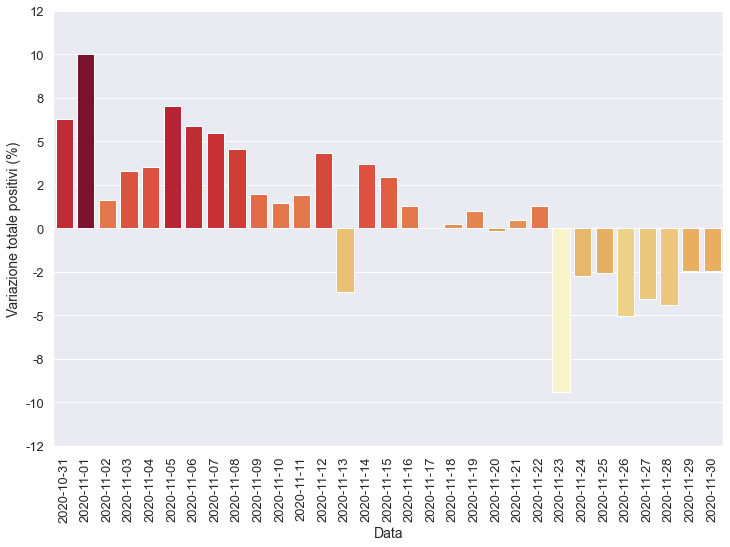

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

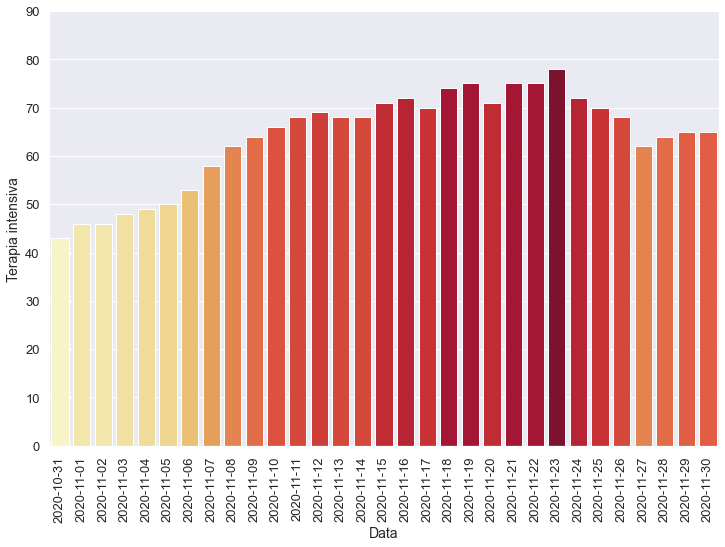

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

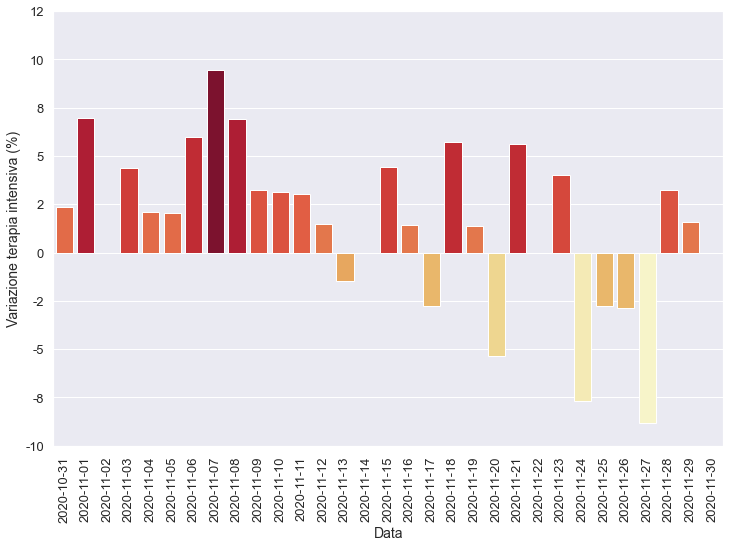

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

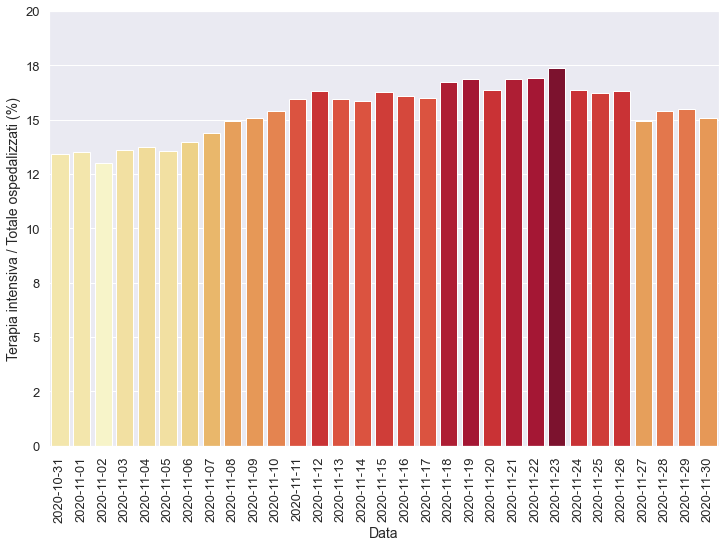

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

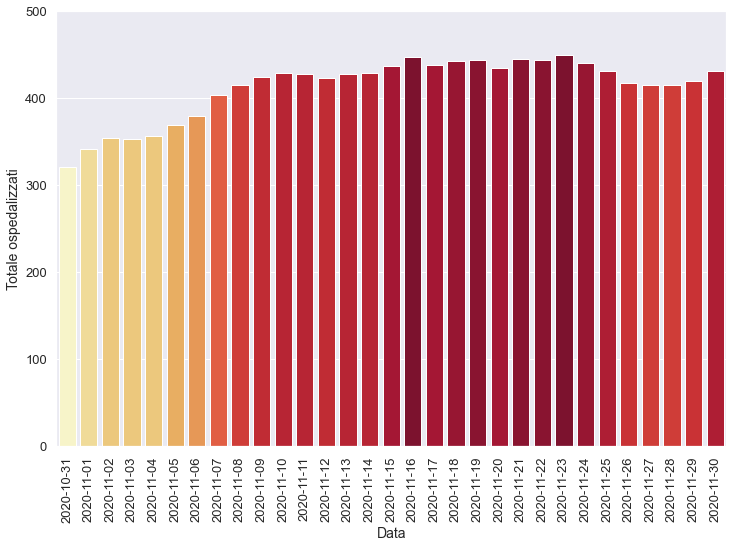

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

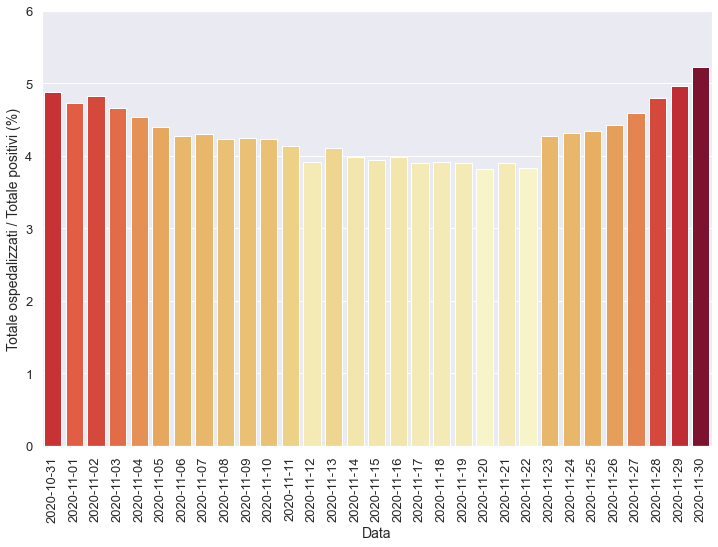

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

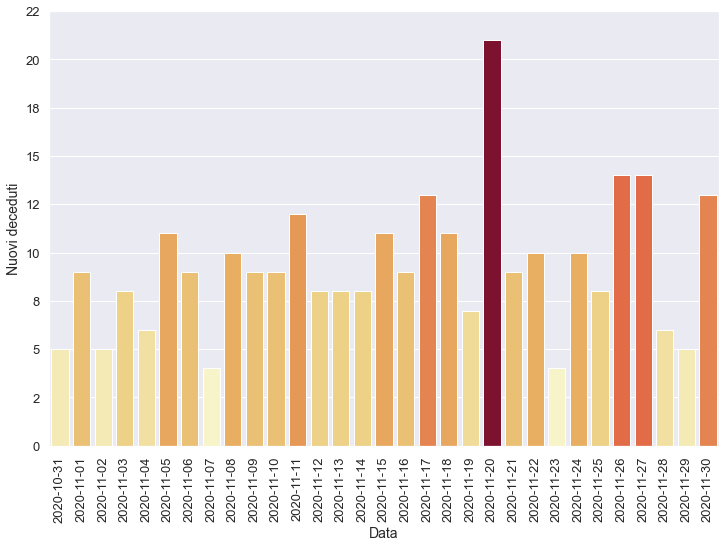

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

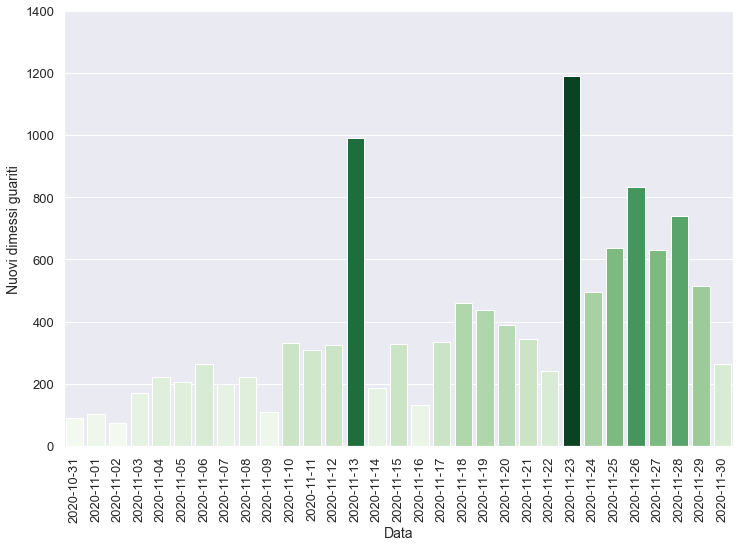

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-23T17:00:00,10,Umbria,371,78,449,10034,10483,-1089,105,...,4.0,448.0,191.0,-1095.0,17.37,4.28,23.44,54.97,4.00,-9.41
1,2020-11-24T17:00:00,10,Umbria,368,72,440,9757,10197,-286,218,...,10.0,4653.0,1592.0,-277.0,16.36,4.31,4.69,13.69,-7.69,-2.73
2,2020-11-25T17:00:00,10,Umbria,361,70,431,9506,9937,-260,386,...,8.0,4331.0,1705.0,-251.0,16.24,4.34,8.91,22.64,-2.78,-2.55
3,2020-11-26T17:00:00,10,Umbria,349,68,417,9017,9434,-503,343,...,14.0,4791.0,1640.0,-489.0,16.31,4.42,7.16,20.91,-2.86,-5.06
4,2020-11-27T17:00:00,10,Umbria,353,62,415,8635,9050,-384,261,...,14.0,3955.0,1275.0,-382.0,14.94,4.59,6.60,20.47,-8.82,-4.07
5,2020-11-28T17:00:00,10,Umbria,351,64,415,8238,8653,-397,348,...,6.0,4262.0,1247.0,-397.0,15.42,4.80,8.17,27.91,3.23,-4.39
6,2020-11-29T17:00:00,10,Umbria,355,65,420,8023,8443,-210,310,...,5.0,3232.0,1169.0,-215.0,15.48,4.97,9.59,26.52,1.56,-2.43
7,2020-11-30T17:00:00,10,Umbria,366,65,431,7804,8235,-208,68,...,13.0,480.0,217.0,-219.0,15.08,5.23,14.17,31.34,0.00,-2.46


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

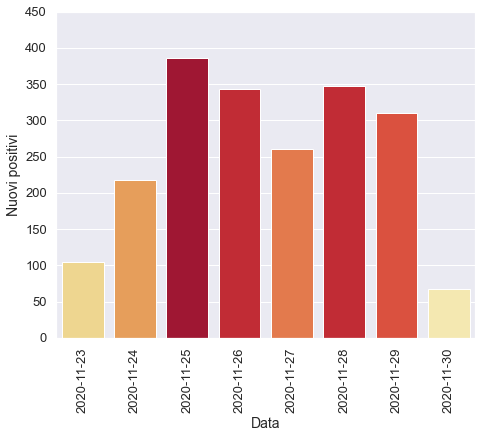

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

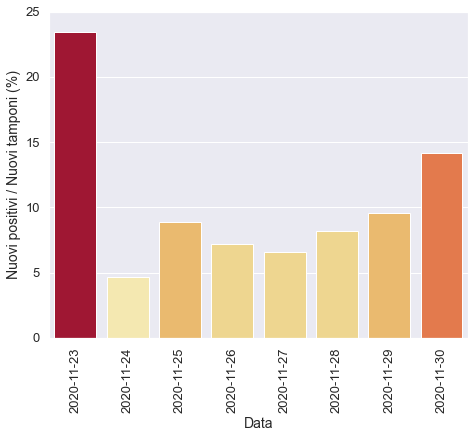

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

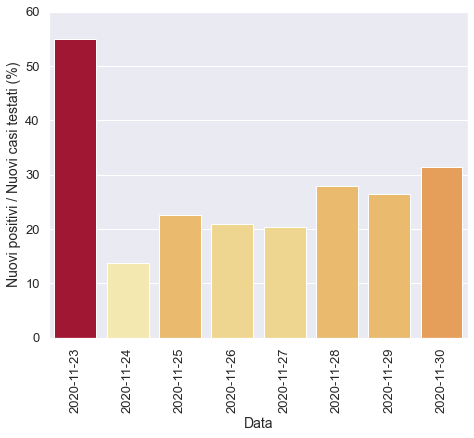

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

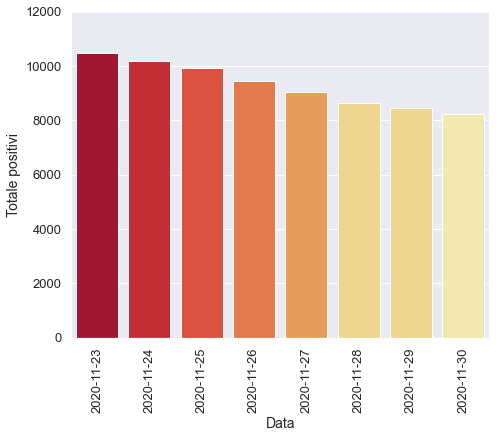

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

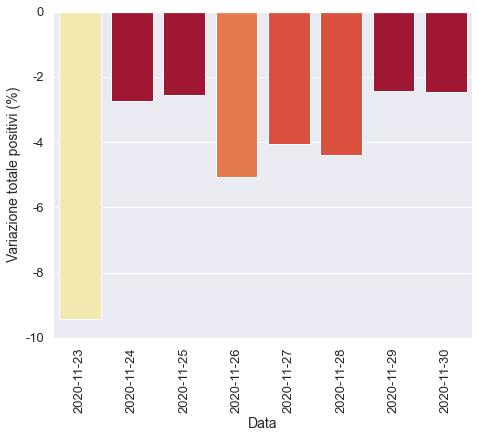

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

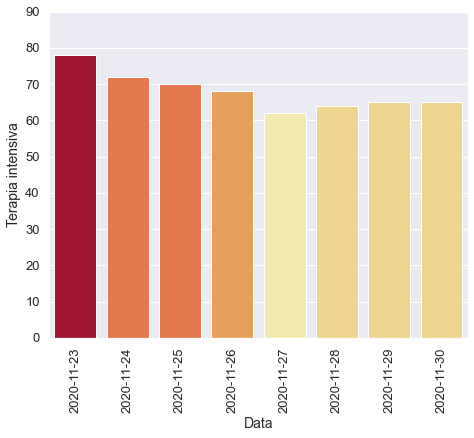

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

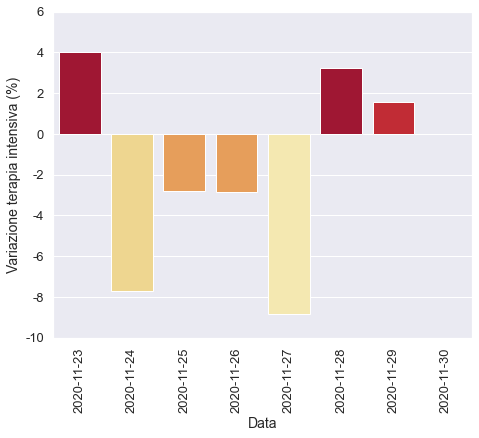

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

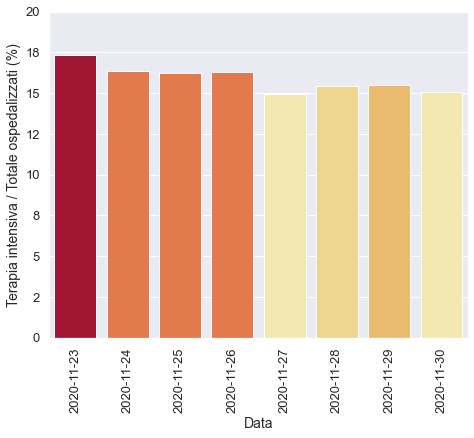

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

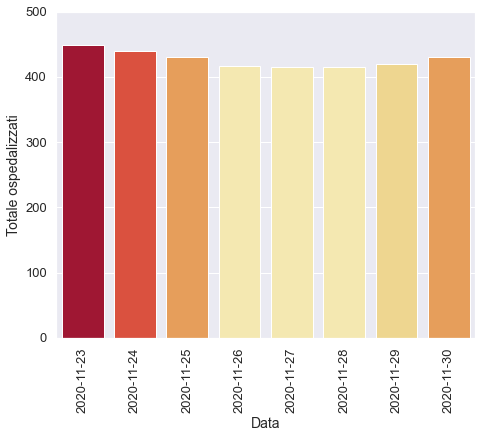

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

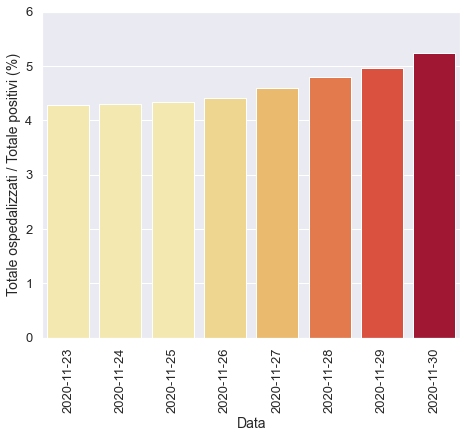

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

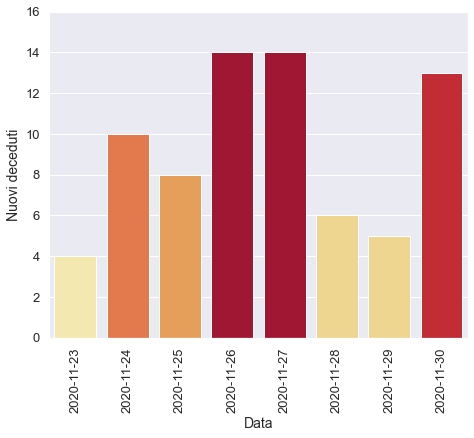

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

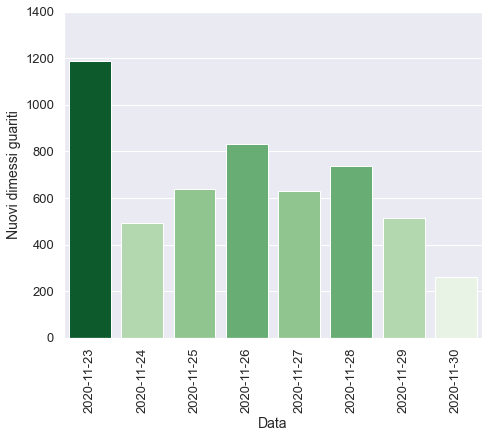

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)